In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


test_labels = test_labels.reshape(-1,)
train_labels = train_labels.reshape(-1,)

# Class A :

## NetA

The first neural network will be the simplest, in that it has no hidden layers. It should take the image
and flatten it to a vector for the input, and then have 10 outputs, one for each class.
There should be no non-linearities for this network and is just a very simple linear classifier.


In [ ]:
class NetA:
  def net(self,X,Y,tX,tY):
    perc=models.Sequential([
                            layers.Flatten(input_shape=(32,32,3)),
                            layers.Dense(10)
    ])
    perc.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics=['accuracy'])
    perc.summary()
    #ann.fit(X,Y, epochs=10)  
    history = perc.fit(X, Y, epochs=50, 
                    validation_data=(tX, tY))  
    acc = perc.evaluate(tX, tY)
    
    y_pred=perc.predict(tX)
    return y_pred,history,acc


# Class B :

## NetB
The second neural network will be slightly more complicated in that it has a hidden layer with 300
nodes and adds a non-linearity between the layers. It should use the following operations in this
order:
* Flatten the image to a vector for the input
* Use a fully-connected linear layer with 300 hidden-neurons
* Use the ReLU activation function
* Use a fully-connected linear layer to the 10 outputs.

In [ ]:
class NetB:

  def net(self,X,Y,tX,tY):
    ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(300, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

    ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    ann.summary()
    #ann.fit(X,Y, epochs=10)  
    history = ann.fit(X, Y, epochs=50, 
                    validation_data=(tX, tY))  
    acc = ann.evaluate(tX, tY)
    y_pred= ann.predict(tX)
    return y_pred,history,acc

# Class C :
## NetC
This third neural network will be a convolutional neural network. It should use the following
operations in this order:
* Use a convolution layer with kernel-width 5 and depth 25
* Use the ReLU activation function
* Use a max-pool operation with kernel-width 2 and stride 2
* Flatten the image to a vector for the next step's input
* Use a fully-connected linear layer to the 10 outputs.


In [ ]:
class NetC:

    def net(self,x,y,tx,ty):
      model = models.Sequential()
      model.add(layers.Conv2D(25 , (5,5), activation='relu', input_shape=(32,32,3),padding="same"))
      model.add(layers.MaxPooling2D((2,2),strides=2))
      model.add(layers.Flatten())
      model.add(layers.Dense(25))
      model.add(layers.Dense(10,activation="softmax"))
      model.summary()

      model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

      history = model.fit(x, y, epochs=50, batch_size=100, 
                    validation_data=(tx, ty)) 
      acc = model.evaluate(tx, ty) 
      y_pred= model.predict(tx)
      return y_pred,history,acc




In [ ]:
predA,hisA,aacA=NetA().net(train_images,train_labels,test_images,test_labels)   


predB,hisB,accB=NetB().net(train_images,train_labels,test_images,test_labels)

     
predC,hisC,accC=NetC().net(train_images,train_labels,test_images,test_labels)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1563/1563 [==============================] - 4s 3ms/step - loss: 9.3924 - accuracy: 0.0981 - val_loss: 17.9506 - val_accuracy: 0.0969
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 9.1142 - accuracy: 0.0997 - val_loss: 10.7024 - val_accuracy: 0.1024
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 8.8059 - accuracy: 0.0996 - val_loss: 8.0349 - val_accuracy: 0.0971
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 8

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


500/500 [==============================] - 2s 4ms/step - loss: 1.9961 - accuracy: 0.2935 - val_loss: 1.8166 - val_accuracy: 0.3605
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 1.7397 - accuracy: 0.3922 - val_loss: 1.6632 - val_accuracy: 0.4148
Epoch 3/50
500/500 [==============================] - 2s 3ms/step - loss: 1.5909 - accuracy: 0.4450 - val_loss: 1.5481 - val_accuracy: 0.4541
Epoch 4/50
500/500 [==============================] - 2s 3ms/step - loss: 1.4895 - accuracy: 0.4769 - val_loss: 1.4336 - val_accuracy: 0.4997
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 1.4186 - accuracy: 0.5037 - val_loss: 1.3909 - val_accuracy: 0.5069
Epoch 6/50
500/500 [==============================] - 2s 3ms/step - loss: 1.3765 - accuracy: 0.5169 - val_loss: 1.3898 - val_accuracy: 0.5092
Epoch 7/50
500/500 [==============================] - 2s 3ms/step - loss: 1.3364 - accuracy: 0.5336 - val_loss: 1.3157 - val_accuracy: 0.5345
Epoch 8/50
500/50

In [ ]:
y_A = [np.argmax(element) for element in predA]
y_B= [np.argmax(element) for element in predB]
y_C=[np.argmax(element) for element in predC]

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Plots for NetA :
* title - truth
* label - prediction 

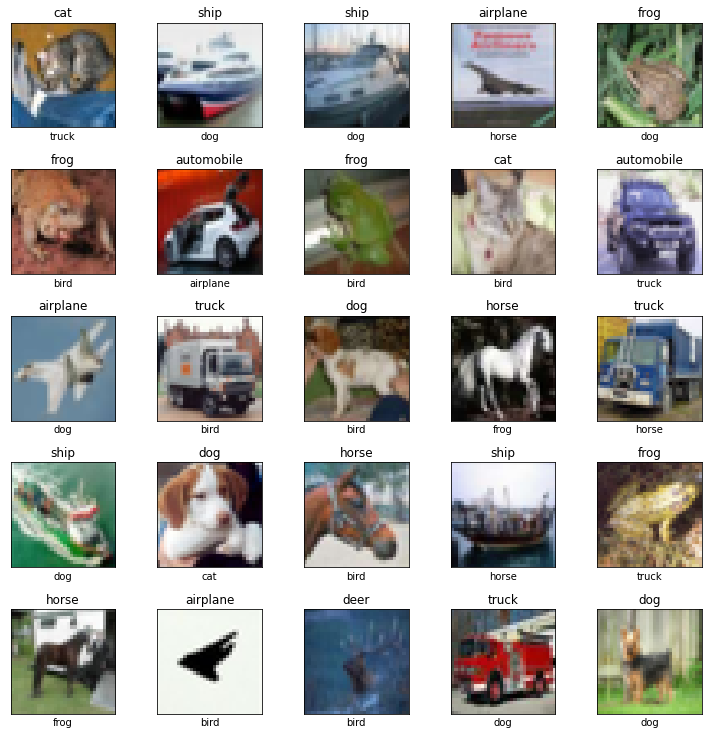

In [ ]:
plt.figure(figsize=(12,12))
plt.title("Plot for NetA")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_A[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Plots for NetB :
* title - truth
* label - prediction 

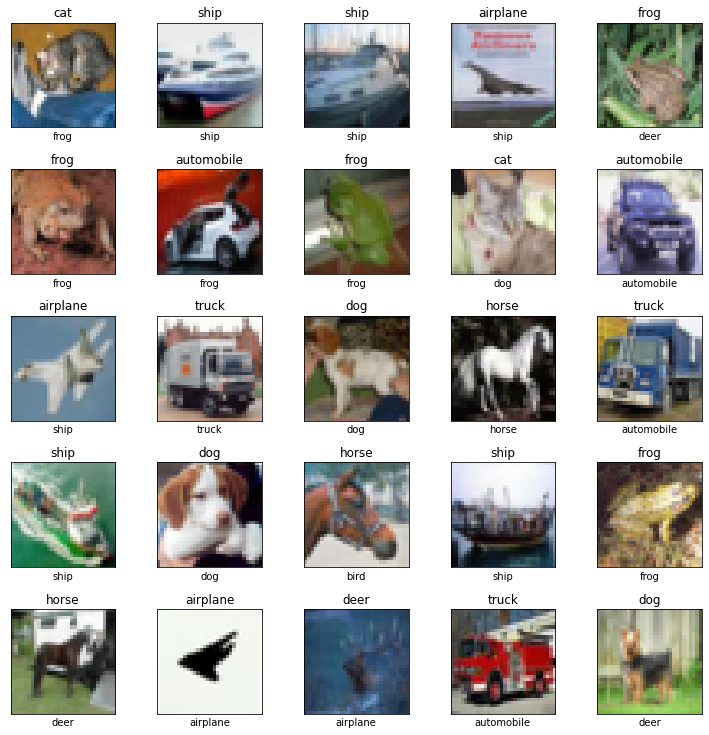

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_B[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Plots for NetC :
* title - truth
* label - prediction 

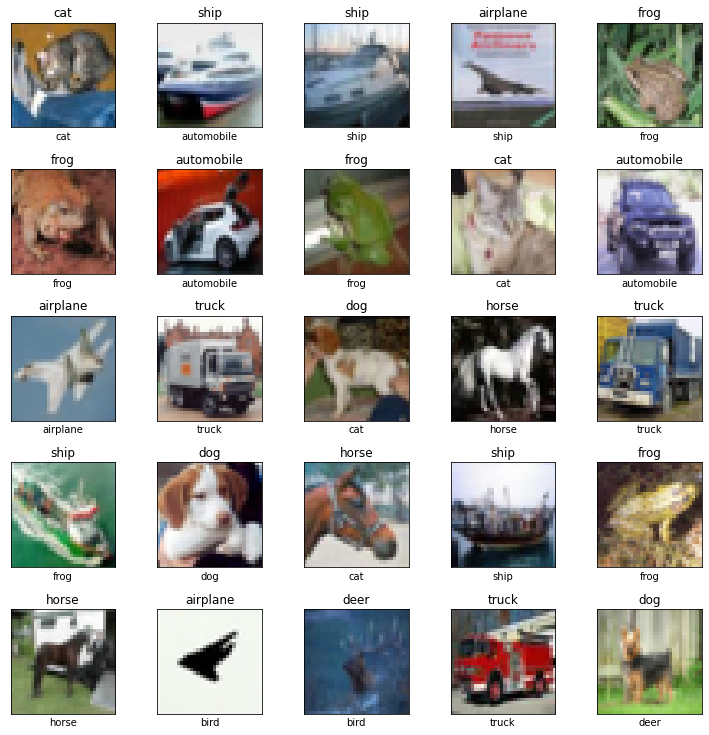

In [ ]:
plt.figure(figsize=(12,12))
plt.title("Plot for NetA")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_C[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Visualization and Accuracy :

<Figure size 432x288 with 0 Axes>

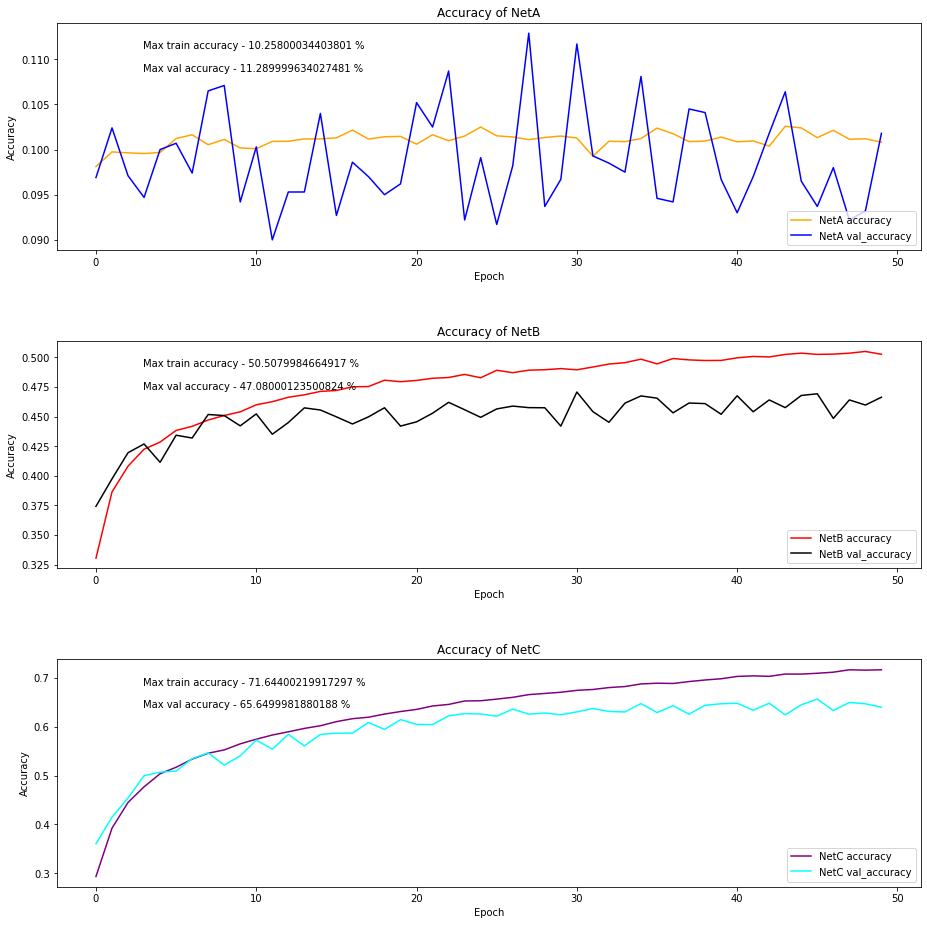

Test accuracy of NetA-  10.180000215768814 %
Test accuracy of NetB-  46.639999747276306 %
Test accuracy of NetC-  63.98000121116638 %


In [ ]:
maxA=sorted(hisA.history['accuracy'],reverse=True)
acrA=str(maxA[0]*100)
maxB=sorted(hisB.history['accuracy'],reverse=True)
acrB=str(maxB[0]*100)
maxC=sorted(hisC.history['accuracy'],reverse=True)
acrC=str(maxC[0]*100)
maxAV=sorted(hisA.history['val_accuracy'],reverse=True)
acrAV=str(maxAV[0]*100)
maxBV=sorted(hisB.history['val_accuracy'],reverse=True)
acrBV=str(maxBV[0]*100)
maxCV=sorted(hisC.history['val_accuracy'],reverse=True)
acrCV=str(maxCV[0]*100)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig, axs = plt.subplots(3, 1,figsize=(15,15))
axs[0].set_title("Accuracy of NetA")
axs[0].plot(hisA.history['accuracy'], label='NetA accuracy',color='orange')
axs[0].plot(hisA.history['val_accuracy'], label = 'NetA val_accuracy',color='blue')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].text(0.1,0.9,'Max train accuracy - '+acrA+' %', verticalalignment='center', transform=axs[0].transAxes)
axs[0].text(0.1,0.8,'Max val accuracy - '+acrAV+' %', verticalalignment='center', transform=axs[0].transAxes)
axs[1].set_title("Accuracy of NetB")
axs[1].plot(hisB.history['accuracy'], label='NetB accuracy',color='red')
axs[1].plot(hisB.history['val_accuracy'], label = 'NetB val_accuracy',color='black')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='lower right')
axs[1].text(0.1,0.9,'Max train accuracy - '+acrB+' %', verticalalignment='center', transform=axs[1].transAxes)
axs[1].text(0.1,0.8,'Max val accuracy - '+acrBV+' %', verticalalignment='center', transform=axs[1].transAxes)
axs[2].set_title("Accuracy of NetC")
axs[2].plot(hisC.history['accuracy'], label='NetC accuracy',color='purple')
axs[2].plot(hisC.history['val_accuracy'], label = 'NetC val_accuracy',color='cyan')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Accuracy')
axs[2].legend(loc='lower right')
axs[2].text(0.1,0.9,'Max train accuracy - '+acrC+' %', verticalalignment='center', transform=axs[2].transAxes)
axs[2].text(0.1,0.8,'Max val accuracy - '+acrCV+' %', verticalalignment='center', transform=axs[2].transAxes)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)   
plt.show()
print("Test accuracy of NetA- ",aacA[1]*100,"%")
print("Test accuracy of NetB- ",accB[1]*100,"%")
print("Test accuracy of NetC- ",accC[1]*100,"%")